# 2021 KT빅데이터 플랫폼 경진대회

# 목차
## 서론
 * 현재 한국 코로나 발생현황
## 본론
### 1. 코로나-19로 인한 수도권 배달 산업 현황
* 배달 건수 및 매출액 현황
* 업종 별 배달 건수 현황
* 생활폐기물 발생량 현황

### 2. 코로나-19로 인한 수도권 배달량과 생활폐기물 및 재활용 폐기물 발생량의 상관관계

* 상관관계 분석

## 결론

## 제안 기대효과


1. 한국 코로나 확진자 수 현황
2. 배달 건수 발생량이 늘었다 라는 것을 보여줌
3. (보너스 시각화)코로나 전 후 음식점 창/폐업 비율을 보여줌
4. 코로나 전/후 업종 별 배달 건수 현황
5. 확진자수와 배달량의 증가에 대한 상관관계
+ 알파

. 배달량과 재활용 쓰레기 증가에 대한 상관관계

# 서론
## 현재 한국 코로나 발생 현황

In [72]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.pyplot import *

plt.rc('font', family='NanumGothic')
mpl.rc('font', family='NanumGothic')

%matplotlib inline

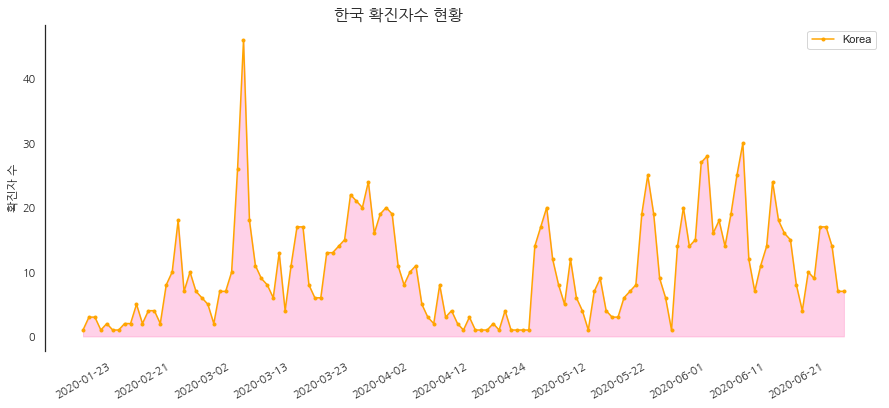

In [63]:
# 코로나 감염 현황(전국) 및 정책 데이터 불러오기
corona = pd.read_csv('./covid_19_dataset/PatientInfo.csv')
corona=corona[corona['province'] == 'Seoul']
policy = pd.read_csv('./covid_19_dataset/Policy.csv')

#격상단계 추출
policy_alert_level=policy.loc[policy['gov_policy'] == 'Infectious Disease Alert Level']
pal_start_date=policy_alert_level[['start_date']]
pal_detail= policy_alert_level['gov_policy']+policy_alert_level['detail']

policy_school_delay=policy.loc[policy['gov_policy'] == 'School Opening Delay']
psd_start_date=policy_school_delay[['start_date']]
psd_detail= policy_school_delay['gov_policy']+policy_school_delay['detail']


# 전국
corona_cnt = pd.DataFrame(corona.groupby('confirmed_date')[['country']].count().to_records())

# 한국 코로나 19 확진자 추이 시각화
fig, ax = plt.subplots(figsize = (15,6))
x1 = corona_cnt.confirmed_date
y1 = corona_cnt.country
sns.set_style('white')

ax.plot(x1,y1, label = 'Korea', color = 'orange', marker = '.')
plt.fill_between(x1, y1, color = 'hotpink', alpha = .3)

#Patientinfo.csv의 infection_case를 반영
#plt.axvline(x = '2020-02-21', color = 'red', linestyle = '--', label = '2020-02-21/Shincheonji Church')
#plt.axvline(x = '2020-05-08', color = 'red', linestyle = '--', label = '2020-05-07/Iteawon Clubs')
#plt.axvline(x = '2020-05-25', color = 'red', linestyle = '--', label = '2020-05-25/Coupang Logistics Center')

#Policy.csv를 사용
#plt.axvline(x = policy_school_delay['start_date'][34], color = 'green', linestyle = '--', label = policy_school_delay['start_date'][34] + '/'+policy_school_delay['gov_policy'][34])
#for i in range(len(pal_start_date)):
#    plt.axvline(x = policy_alert_level['start_date'][i], color = 'b', linestyle = '--',label = policy_alert_level['start_date'][i] + '/'+ policy_alert_level['gov_policy'][i] + policy_alert_level['detail'][i])



ax.set_xticks(ax.get_xticks()[::10])
plt.xticks(rotation = 30)
plt.title("한국 확진자수 현황", size = 16, ha = 'right')
plt.ylabel('확진자 수')
plt.legend()
sns.despine(top = True, bottom = True)
plt.show()

# 본론
## 1. 코로나-19로 인한 수도권 배달 산업 현황
### 1-1. 전국 배달 건수 및 매출액 현황

#### 1-1-1 전국 배달 건수 현황

In [ ]:
dlvr_call=pd.read_csv('./KT_빅데이터플랫폼_데이터셋/dlvr_call.csv')
dlvr_call=dlvr_call[dlvr_call['DLVR_STORE_BRTC_NM'] == '서울특별시']

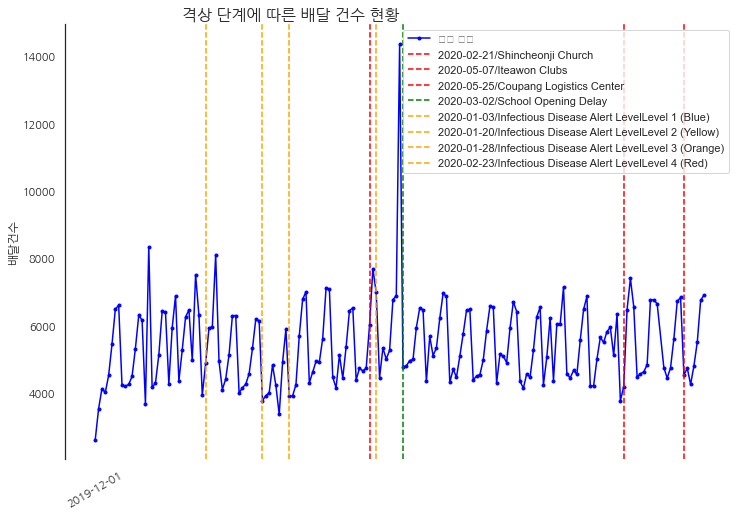

In [66]:
# 전국 배달 건수 현황
dlvr_call_cnt = pd.DataFrame(dlvr_call.groupby('PROCESS_DT')[['GOODS_AMOUNT']].count().to_records())
fig, ax = plt.subplots(figsize=(12,8))
x2 = dlvr_call_cnt.PROCESS_DT
y2 = dlvr_call_cnt.GOODS_AMOUNT
sns.set_style('white')
ax.plot(x2,y2, label = '배달 건수', color = 'blue', marker = '.')
#Patientinfo.csv의 infection_case를 반영
plt.axvline(x = '2020-02-21', color = 'red', linestyle = '--', label = '2020-02-21/Shincheonji Church')
plt.axvline(x = '2020-05-07', color = 'red', linestyle = '--', label = '2020-05-07/Iteawon Clubs')
plt.axvline(x = '2020-05-25', color = 'red', linestyle = '--', label = '2020-05-25/Coupang Logistics Center')

#Policy.csv를 사용
plt.axvline(x = policy_school_delay['start_date'][34], color = 'green', linestyle = '--', label = policy_school_delay['start_date'][34] + '/'+policy_school_delay['gov_policy'][34])
for i in range(len(pal_start_date)):
    plt.axvline(x = policy_alert_level['start_date'][i], color = 'orange', linestyle = '--',label = policy_alert_level['start_date'][i] + '/'+ policy_alert_level['gov_policy'][i] + policy_alert_level['detail'][i])


ax.set_xticks(ax.get_xticks()[::10])
plt.xticks(rotation = 30)
plt.title("격상 단계에 따른 배달 건수 현황", size = 16, ha = 'right')
plt.ylabel('배달건수')
plt.legend()
sns.despine(top = True, bottom = True)
plt.show()


#### 1-1-2. 서울시 배달 매출액 현황

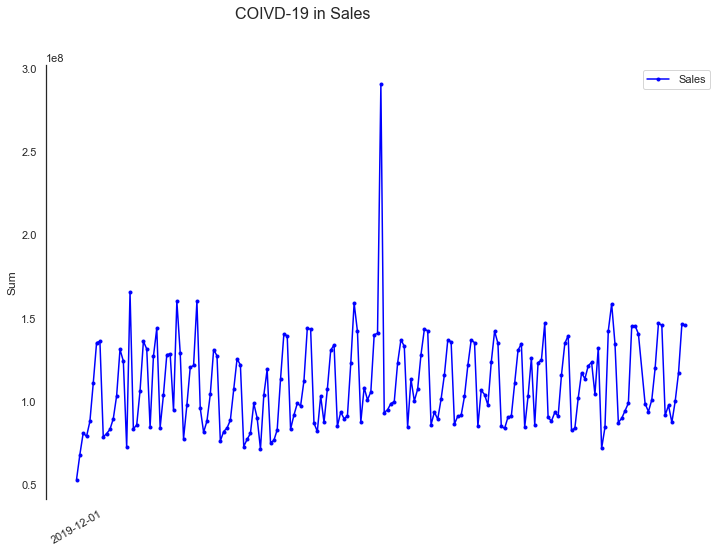

In [34]:
# 서울시 배달 매출액 현황
goods_amount_sum = pd.DataFrame(dlvr_call.groupby('PROCESS_DT')[['GOODS_AMOUNT']].sum().to_records())
fig, ax = plt.subplots(figsize = (12,8))
x2 = goods_amount_sum.PROCESS_DT
y2 = goods_amount_sum.GOODS_AMOUNT
sns.set_style('white')
ax.plot(x2,y2, label = 'Sales', color = 'blue', marker = '.')

ax.set_xticks(ax.get_xticks()[::10])
plt.xticks(rotation = 30)
plt.suptitle("COIVD-19 in Sales", size = 16, ha = 'right')
plt.ylabel('Sum')
plt.legend()
sns.despine(top = True, bottom = True)
plt.show()

### 1-2. 업종 별 배달 건수 현황

Text(0.5, 1.0, '코로나 전/후 업종별 배달 건수 비교')

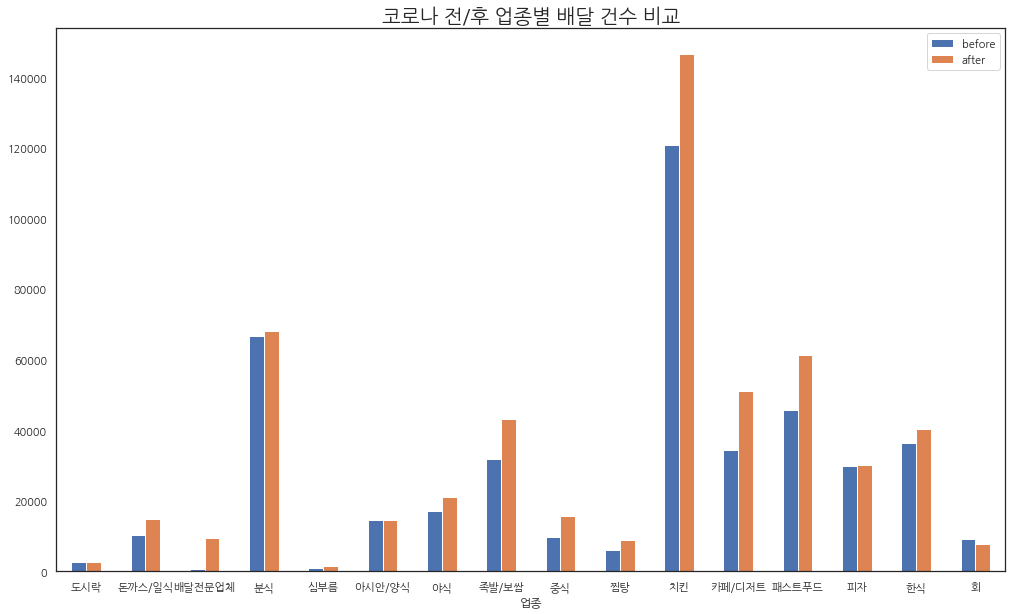

In [68]:
dlvr_call['PROCESS_DT'] = pd.to_datetime(dlvr_call['PROCESS_DT'])
#코로나 전/후
before = dlvr_call[dlvr_call['PROCESS_DT'] < pd.to_datetime('2020-02-23')]
after = dlvr_call[dlvr_call['PROCESS_DT'] > pd.to_datetime('2020-02-23')]

#코로나 전 후 업종별 배달 건수
before_induty_count=pd.DataFrame(before.groupby(['DLVR_STORE_INDUTY_NM'])['GOODS_AMOUNT'].count()).reset_index()
after_induty_count=pd.DataFrame(after.groupby(['DLVR_STORE_INDUTY_NM'])['GOODS_AMOUNT'].count()).reset_index()
before_induty_count.columns=['업종','before']
after_induty_count.columns=['업종','after']

total=before_induty_count.join(after_induty_count.set_index('업종'), on= '업종')
#시각화
total.plot(kind='bar',x='업종',rot=0,figsize=(17,10))
plt.title("코로나 전/후 업종별 배달 건수 비교",fontsize=20)

### 1-3. 코로나 전/후 배달 전문 업체 창업 건수

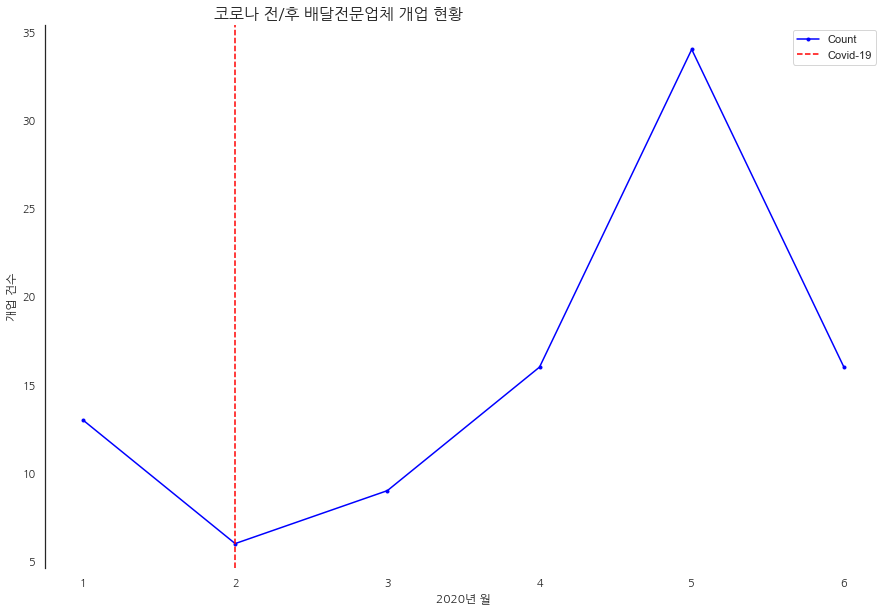

In [73]:
test=pd.read_csv("./KT_빅데이터플랫폼_데이터셋/StartupOrClosing_Shop.csv",encoding="euc-KR")
dlvr_company=['음식배달대행','배달용역','한식배달']
test_food_dlvr=pd.DataFrame(test[test['INDUTY_NM'].isin(dlvr_company)])

test_food_dlvr['DATE']=pd.to_datetime(test_food_dlvr['DATE'],format="%Y%m%d")
test_food_dlvr.set_index('DATE',inplace=True)
test_food_dlvr['M_DATE']=test_food_dlvr.index.month

food_dlvr_cnt = pd.DataFrame(test_food_dlvr[test_food_dlvr['division']==1].groupby(['M_DATE'])[['INDUTY_NM']].count().to_records())

fig, ax = plt.subplots(figsize = (15,10))
x2 = food_dlvr_cnt.M_DATE
y2 = food_dlvr_cnt.INDUTY_NM
sns.set_style('white')
ax.plot(x2,y2, label = 'Count', color = 'blue', marker = '.')
plt.axvline(x = x2[1], color = 'red', linestyle = '--', label = 'Covid-19')
plt.title("코로나 전/후 배달전문업체 개업 현황", size = 16, ha = 'right')
plt.xlabel('2020년 월')
plt.ylabel('개업 건수')
plt.legend()
sns.despine(top = True, bottom = True)
plt.show()

### 1-4. 폐기물 발생량 현황

#### 1-4-1. 생활폐기물 발생량 현황

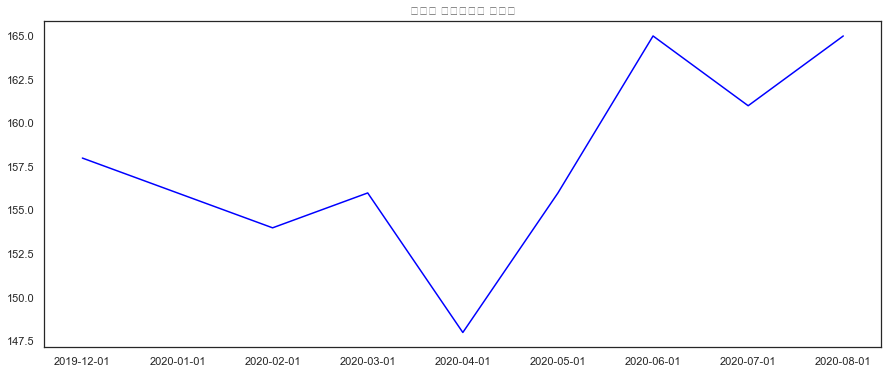

In [22]:
recycle=pd.read_csv("./KT_빅데이터플랫폼_데이터셋/2020_guro_recycle_data.csv",encoding="euc-KR")
plt.figure(figsize=(15,6))
plt.plot(recycle['Process Dt'],recycle['생활폐기물'],color='blue')
#plt.text(recycle['Process Dt'],recycle['생활폐기물'],recycle['생활폐기물'])
plt.title("구로구 생활폐기물 배출량")
plt.show()

#### 1-4-2. 재활용폐기물 발생량 현황

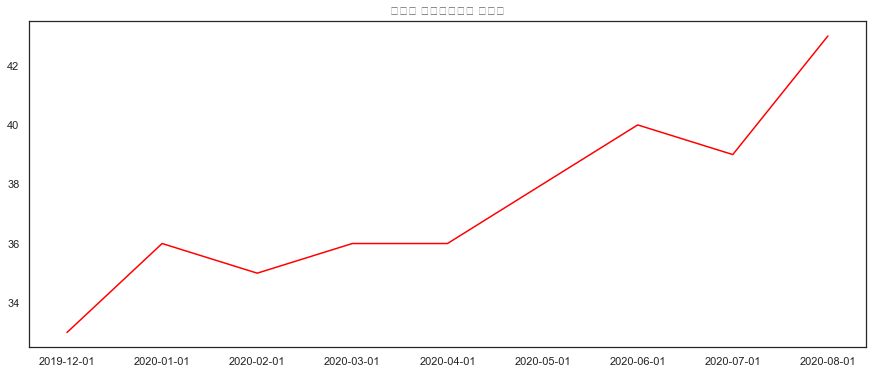

In [23]:
plt.figure(figsize=(15,6))
plt.plot(recycle['Process Dt'],recycle['재활용폐기물'],color='red')
plt.title("구로구 재활용폐기물 배출량")
plt.show()

### 2. 코로나-19로 인한 수도권 배달량과 생활폐기물 및 재활용 폐기물 발생량의 상관관계

* 상관관계 분석

#### 2-1. 코로나 확진자 수와 수도권 배달량의 상관관계 분석

#### 2-2. 수도권 배달량과 생활폐기물 발생량의 상관관계 분석

(0.16055360547683964, 0.7612389238748511)

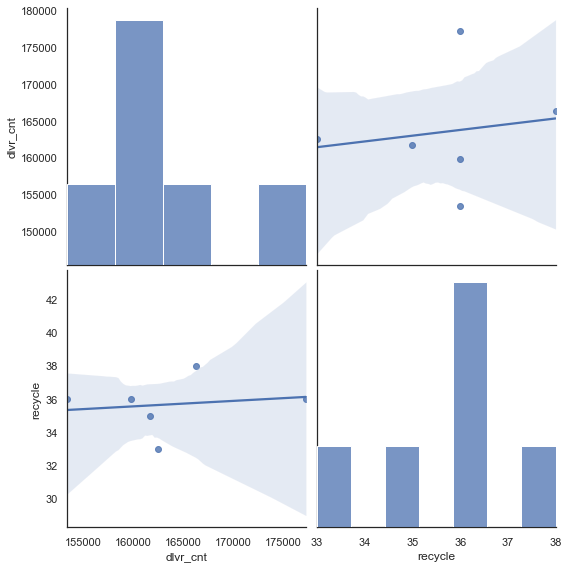

In [24]:
dlvr_call_cnt = pd.DataFrame(dlvr_call.groupby('PROCESS_DT')[['GOODS_AMOUNT']].count().to_records())
dlvr_call_cnt['month_year'] = dlvr_call_cnt['PROCESS_DT'].dt.to_period('M')

dlvr_call_1M_cnt = pd.DataFrame(dlvr_call_cnt.groupby('month_year')[['GOODS_AMOUNT']].sum().to_records())

recycle['Process Dt']=pd.to_datetime(recycle['Process Dt'])
recycle['month_year'] = recycle['Process Dt'].dt.to_period('M')
recycle=recycle[:6]
recycle=recycle[['month_year','재활용폐기물']]

#상관관계분석
correlation=dlvr_call_1M_cnt.join(recycle.set_index('month_year'), on= 'month_year')
correlation.columns=['Date','dlvr_cnt','recycle']

#그래프 시각화
sns.pairplot(correlation, kind='reg', height=4) 


# 피어슨 상관계수 검정
corr = stats.pearsonr(correlation.dlvr_cnt, correlation.recycle)
corr